In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('data/IGN.csv', sep=",")

In [5]:
data.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


In [6]:
data.shape

(18625, 8)

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 18625


In [8]:
# Список колонок
data.columns

Index(['title', 'score', 'score_phrase', 'platform', 'genre', 'release_year',
       'release_month', 'release_day'],
      dtype='object')

In [9]:
# Список колонок с типами данных
data.dtypes

title             object
score            float64
score_phrase      object
platform          object
genre             object
release_year       int64
release_month      int64
release_day        int64
dtype: object

In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

title - 0
score - 0
score_phrase - 0
platform - 0
genre - 36
release_year - 0
release_month - 0
release_day - 0


In [11]:
# Основные статистические характеристки набора данных
data.describe()

,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.00000,18625.000000
mean,6.950459,2006.515329,7.13847,15.603866
std,1.711736,4.587529,3.47671,8.690128
min,0.500000,1970.000000,1.00000,1.000000
25%,6.000000,2003.000000,4.00000,8.000000
50%,7.300000,2007.000000,8.00000,16.000000
75%,8.200000,2010.000000,10.00000,23.000000
max,10.000000,2016.000000,12.00000,31.000000


In [13]:
data['release_day'].unique()

array([ 6, 25, 20, 29, 16, 17, 14, 30, 28,  5, 12, 13, 24, 23, 19, 27,  4,
        7, 21, 26, 11,  8, 10,  2, 18,  1, 15,  9, 22,  3, 31],
      dtype=int64)

<Axes: xlabel='score', ylabel='release_year'>

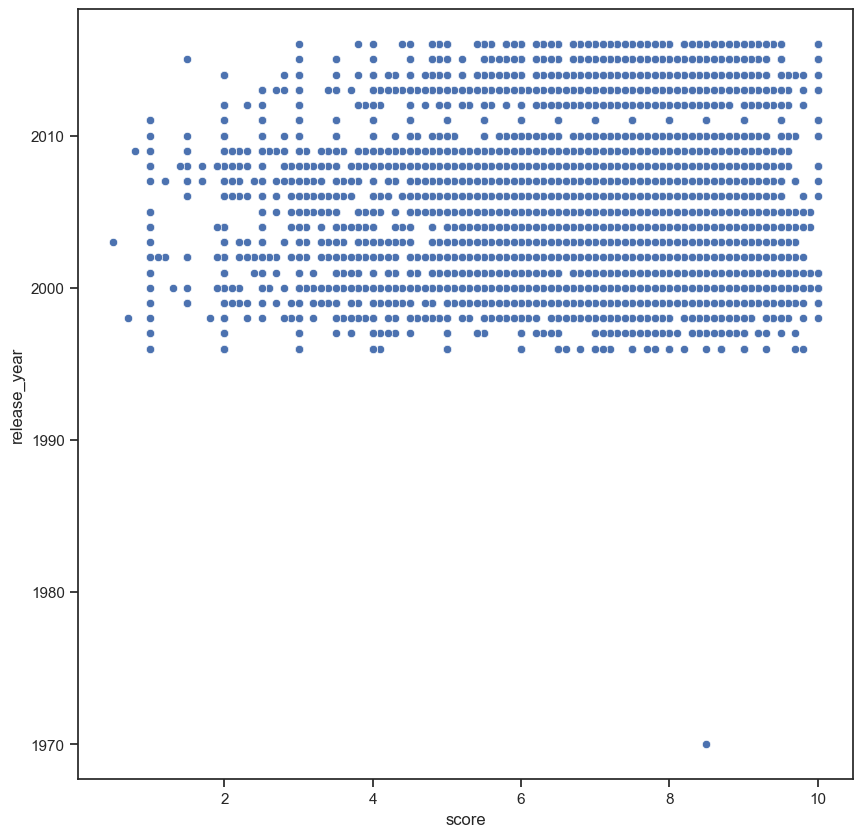

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='score', y='release_year', data=data)

<Axes: xlabel='score', ylabel='release_year'>

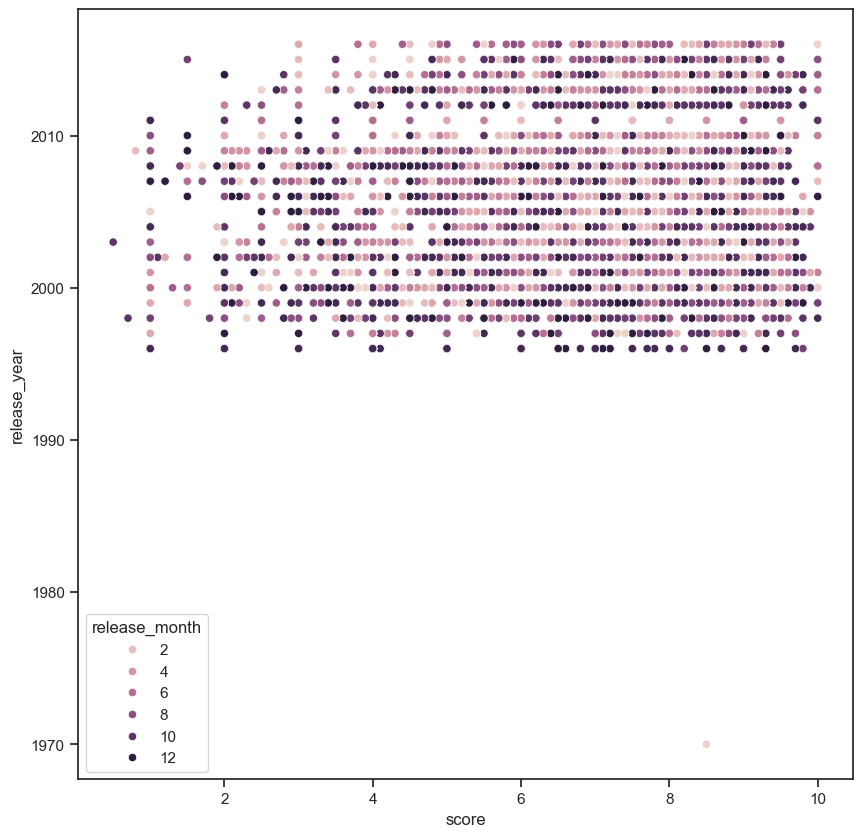

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='score', y='release_year', data=data, hue='release_month')

C:\Users\Родион\AppData\Local\Temp\ipykernel_15648\2191782576.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['score'])


<Axes: xlabel='score', ylabel='Density'>

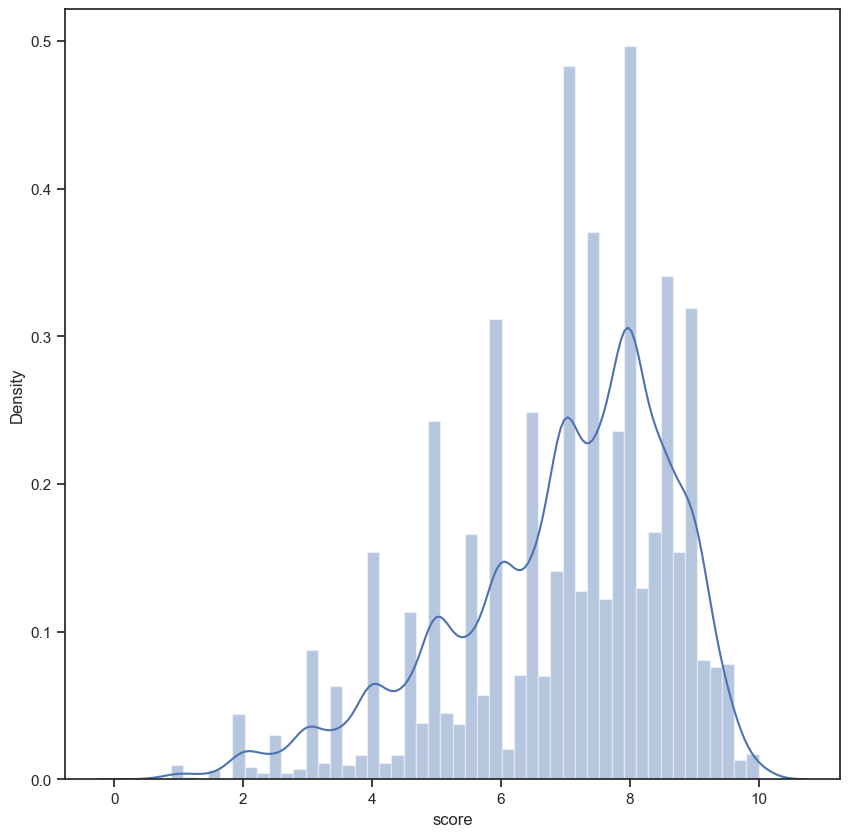

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['score'])

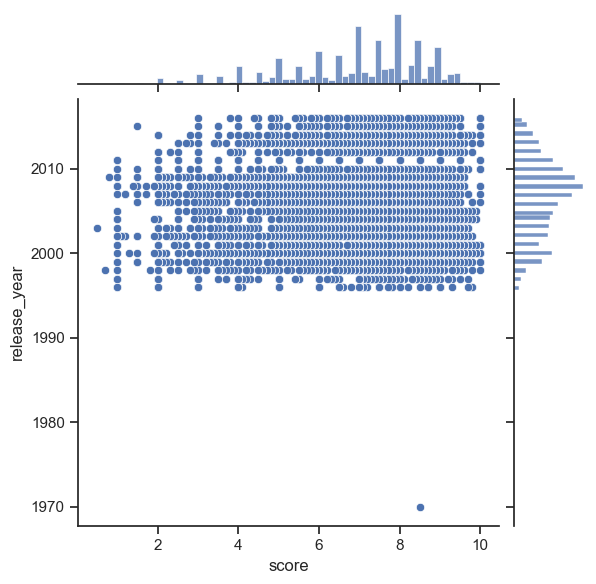

In [21]:
sns.jointplot(x='score', y='release_year', data=data)

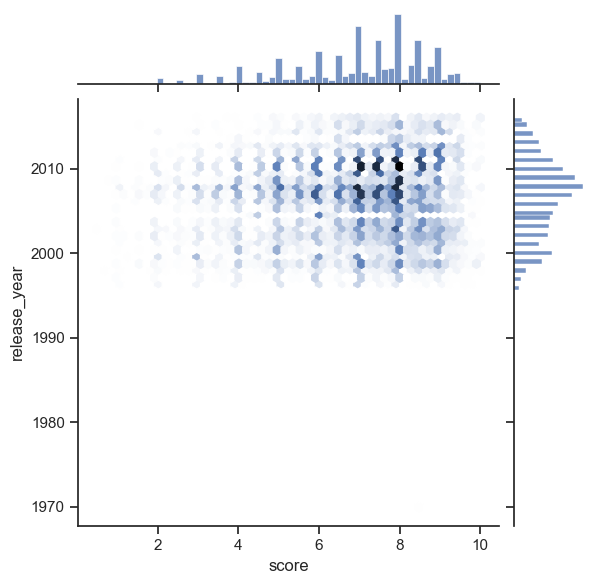

In [22]:
sns.jointplot(x='score', y='release_year', data=data, kind='hex')

KeyboardInterrupt: 

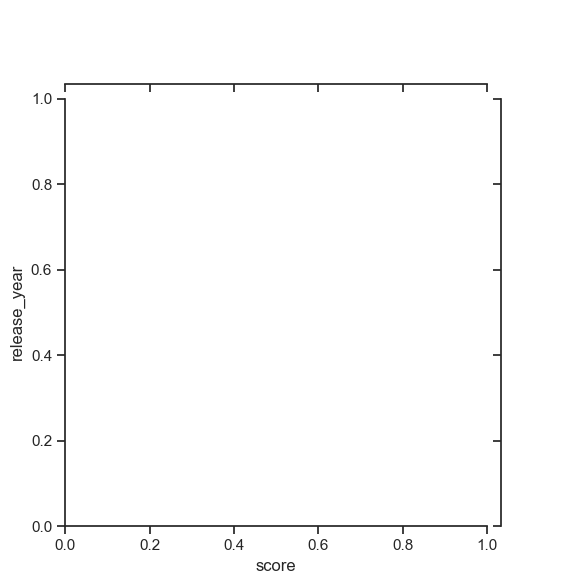

In [24]:
sns.jointplot(x='score', y='release_year', data=data, kind='kde')

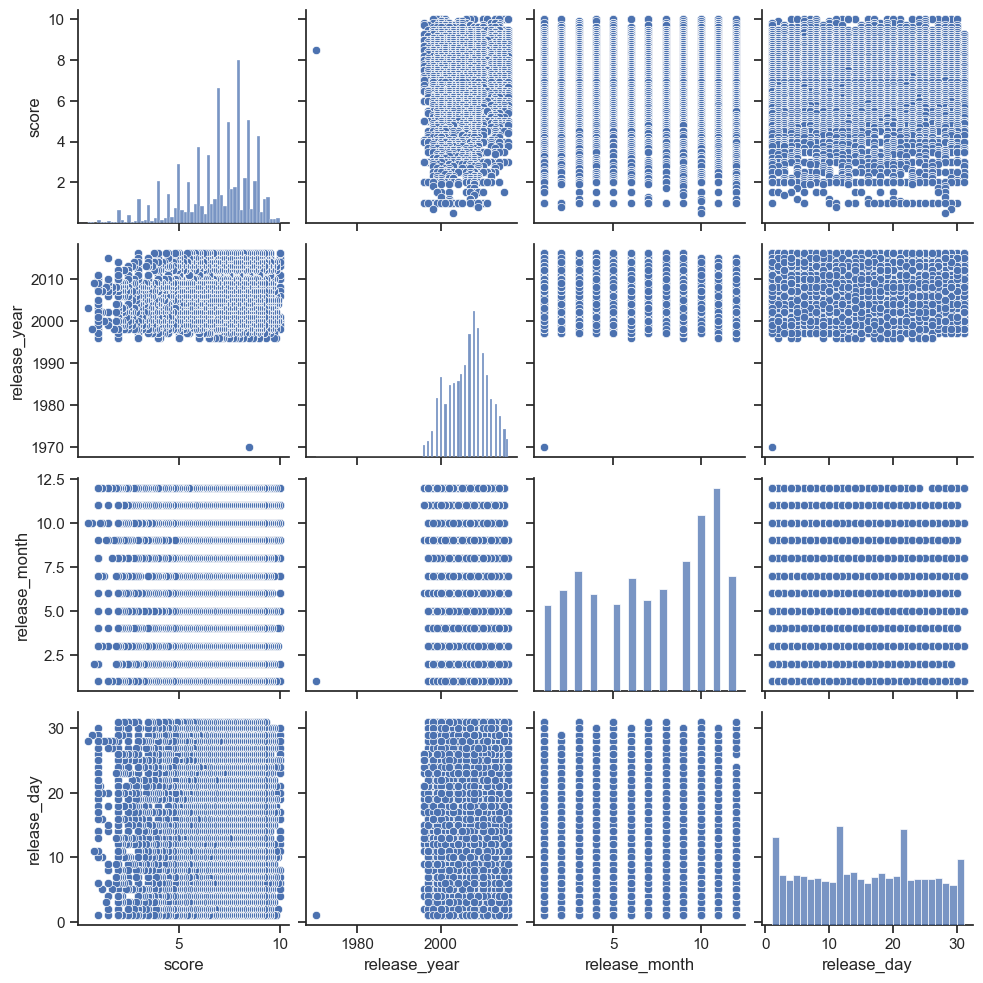

In [25]:
sns.pairplot(data)

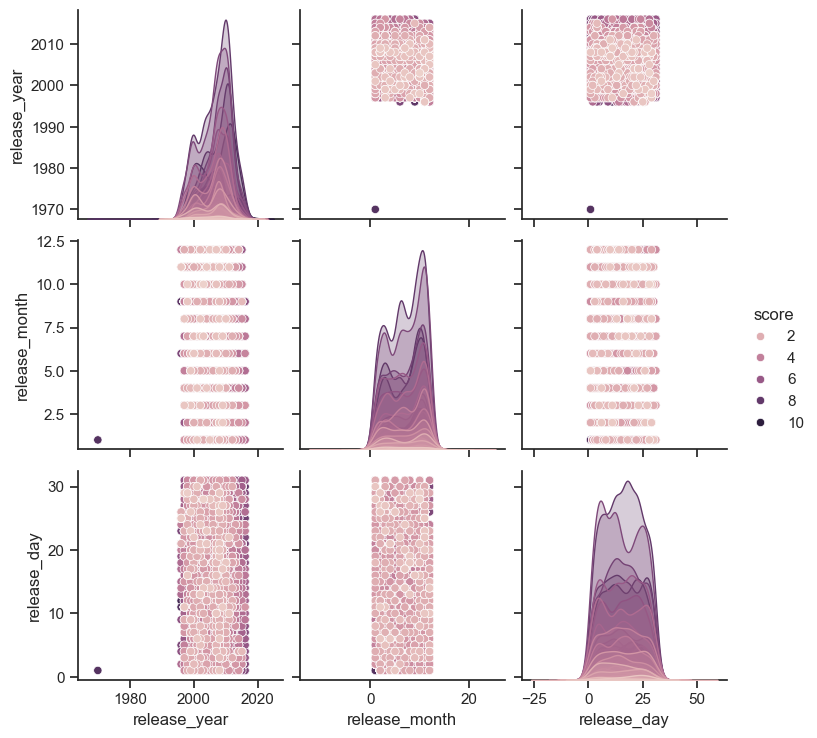

In [26]:
sns.pairplot(data, hue="score")

<Axes: xlabel='score'>

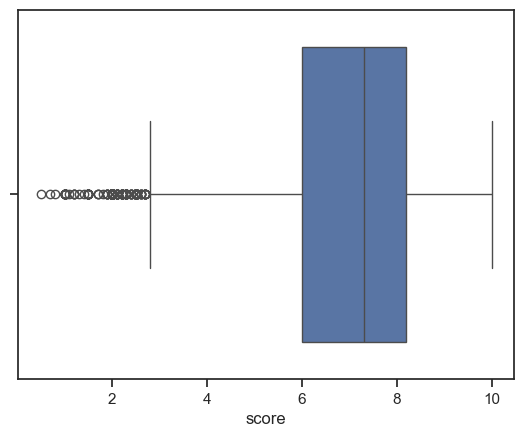

In [27]:
sns.boxplot(x=data['score'])

<Axes: ylabel='score'>

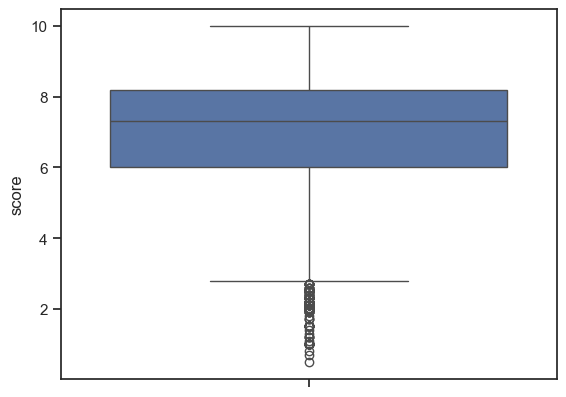

<Axes: xlabel='release_year', ylabel='score'>

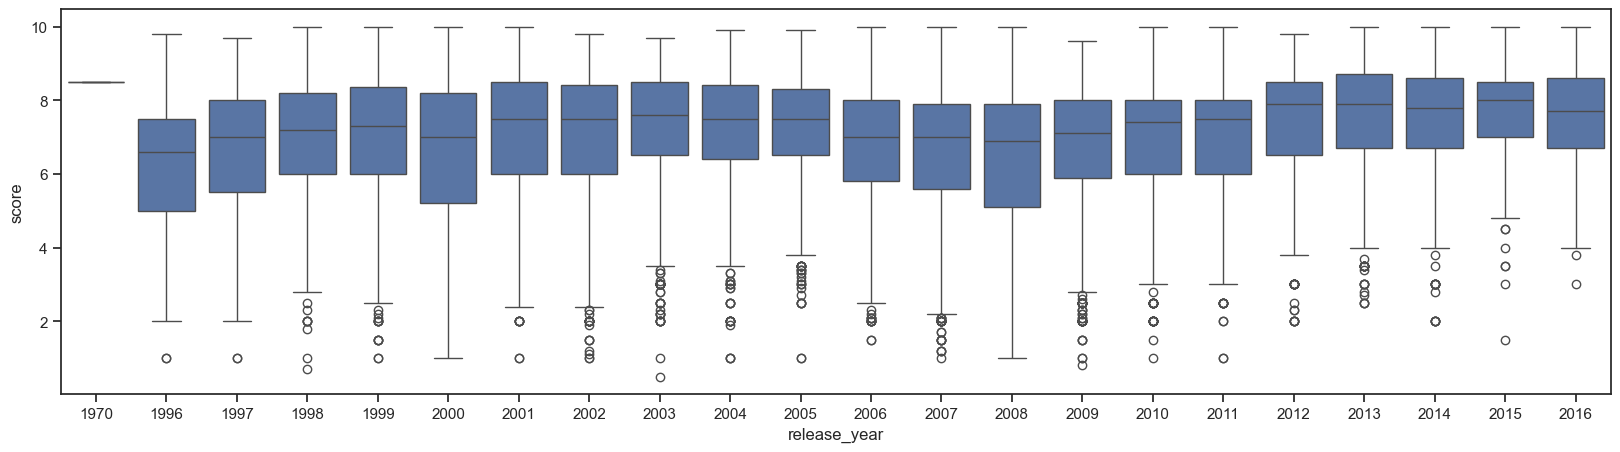

In [61]:
# Распределение параметра score сгруппированные по release_year.
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,5))
sns.boxplot(x='release_year', y='score', data=data, ax=ax)

<Axes: xlabel='score'>

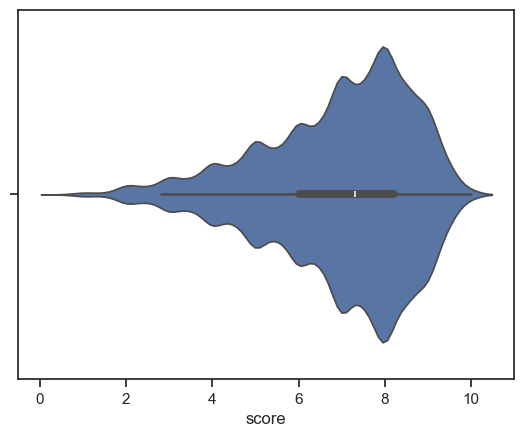

In [30]:
sns.violinplot(x=data['score'])

C:\Users\Родион\AppData\Local\Temp\ipykernel_15648\2545529943.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['score'], ax=ax[1])


<Axes: xlabel='score', ylabel='Density'>

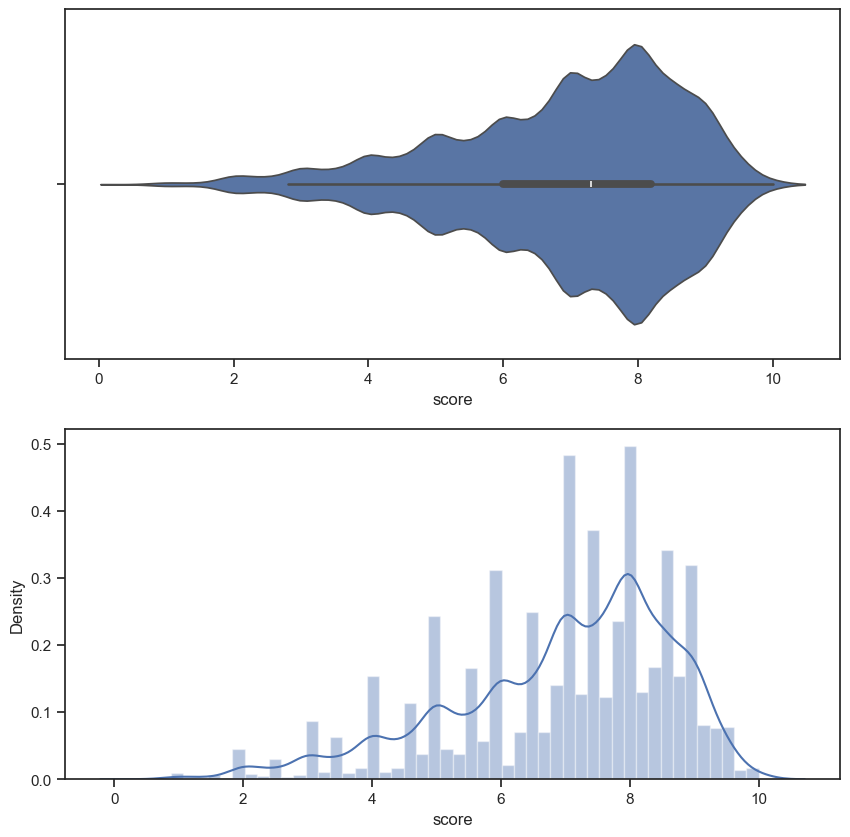

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['score'])
sns.distplot(data['score'], ax=ax[1])

<Axes: xlabel='score', ylabel='release_year'>

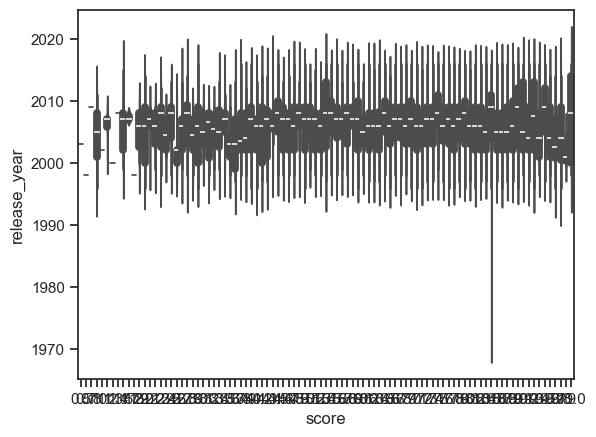

In [37]:
# Распределение параметра score сгруппированные по release_year.
sns.violinplot(x='score', y='release_year', data=data)

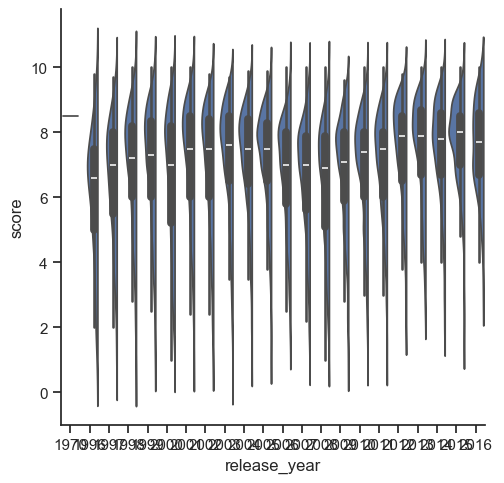

In [35]:
sns.catplot(y='score', x='release_year', data=data, kind="violin", split=True)

In [52]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numeric_columns].corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


In [53]:
data[numeric_columns].corr(method='pearson')

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


In [56]:
data[numeric_columns].corr(method='spearman')

,score,release_year,release_month,release_day
score,1.000000,0.046864,0.001508,0.020874
release_year,0.046864,1.000000,-0.117121,0.018867
release_month,0.001508,-0.117121,1.000000,-0.080846
release_day,0.020874,0.018867,-0.080846,1.000000


<Axes: >

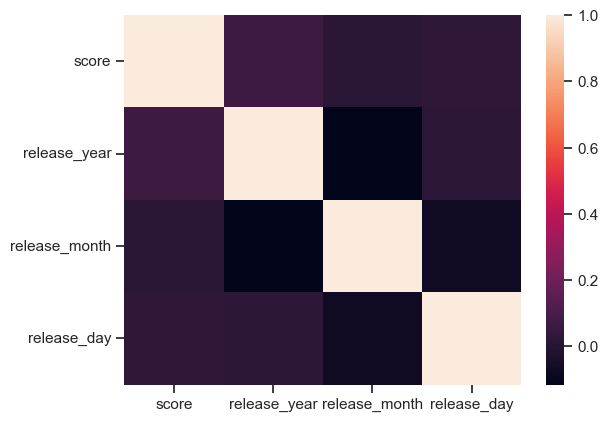

In [57]:
sns.heatmap(data[numeric_columns].corr())

<Axes: >

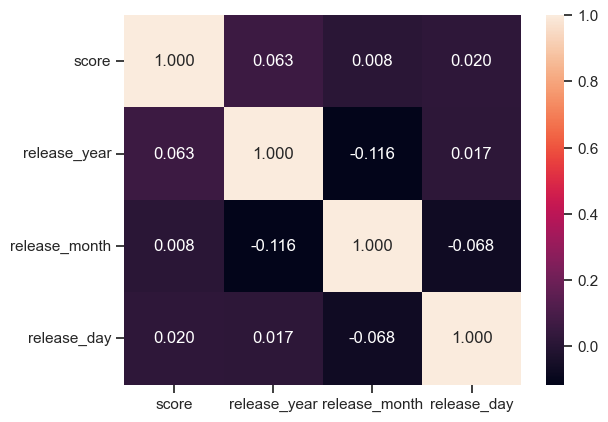

In [59]:
sns.heatmap(data[numeric_columns].corr(), annot=True, fmt='.3f')